In [1]:
from __future__ import print_function
import pylab as pl
import pandas as pd
import numpy as np
import zipfile

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
datestring = '201507' #July 2015 data
!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"

zf = zipfile.ZipFile(datestring+'-citibike-tripdata.zip')
df = pd.read_csv(zf.open(datestring+'-citibike-tripdata.csv'))

df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32.9M  100 32.9M    0     0  40.9M      0 --:--:-- --:--:-- --:--:-- 52.5M


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1


In [3]:
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1,2015-07-01 00:00:03
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1,2015-07-01 00:00:06
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1,2015-07-01 00:00:17
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1,2015-07-01 00:00:23
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1,2015-07-01 00:00:44


In [4]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

### By Gender
##### extracting gender and age and removing data no longer needed

In [5]:
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [6]:
df.drop([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'], axis=1, inplace=True)
df.head()

,ageM,ageF
0,45.0,NaN
1,31.0,NaN
2,23.0,NaN
3,25.0,NaN
4,27.0,NaN


In [8]:
df.describe()

,ageM,ageF
count,687252.000000,217011.000000
mean,38.767317,36.997862
std,11.452814,11.137304
min,16.000000,16.000000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,130.000000,89.000000


In [9]:
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

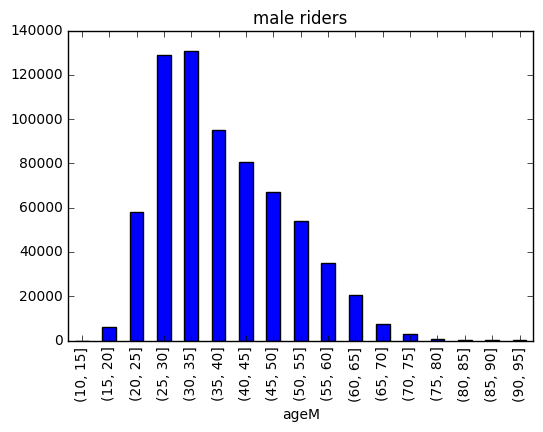

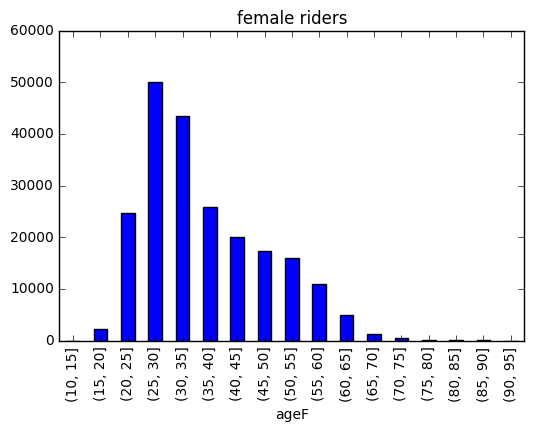

In [10]:
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

### Figure 1: histogrammed distribution of riders' ages by gender

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.000753
(20, 25]       0.030148
(25, 30]       0.072902
(30, 35]       0.083129
(35, 40]       0.063430
(40, 45]       0.038023
(45, 50]       0.020374
(50, 55]       0.015348
(55, 60]       0.014436
(60, 65]       0.007441
(65, 70]       0.002506
(70, 75]       0.000079
(75, 80]       0.000315
(80, 85]       0.000004
(85, 90]       0.000004
(90, 95]       0.000000


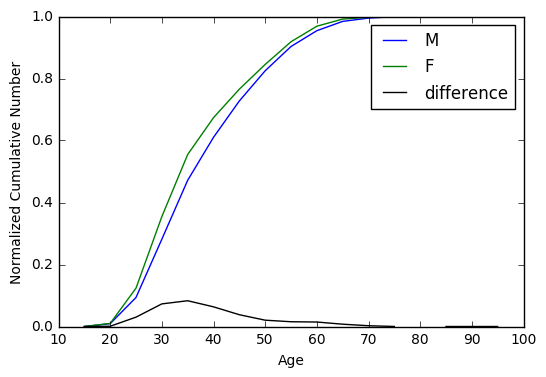

In [11]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

### Figure 2: the cumulative distribution of CitiBike riders' ages by gender

In [12]:
import scipy.stats

### KS tests to compare 2 samples

#### Null Hypothesis: the sample of female Citi Bike rider ages is from the same sample distribution as the sample of male Citi Bike rider ages
#### alpha = 0.05

In [13]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.11005115201581227, pvalue=0.0)


###### The KS test returned the D statistic of .11 and a p value of 0.0.  According to the critical values table c(alpha) for alpha = 0.05 is 1.36. The null hypotheis cannot be rejected because D (.11)  is not larger than c(alpha) of 1.36.

## Now redo the test with a subsample of the data: take only 1 ride every of 200

#### Null Hypothesis: the sample of female Citi Bike rider ages is from the same sample distribution as the sample of male Citi Bike rider ages

#### alpha = 0.05

In [14]:
# pull 1 ride from every 200 rides
df1 = df[::200]
df1.head()

,ageM,ageF
0,45.0,NaN
200,48.0,NaN
400,NaN,NaN
600,39.0,NaN
800,39.0,NaN


In [16]:
df1['ageM'].dropna(inplace= True)
df1['ageF'].dropna(inplace= True)

ks = scipy.stats.ks_2samp(df1.ageM, df1.ageF)
print (ks)

Ks_2sampResult(statistic=0.10426830055931392, pvalue=2.8617252905297315e-08)


##### The KS test returned the D statistic of .10 and a p value of 2.8.  According to the critical values table c(alpha) for alpha = 0.05 is 1.36. The null hypotheis cannot be rejected because D (.10)  is not larger than c(alpha) of 1.36.

###  Pearson's test for correlation - performing with subsample set obtained in previous exercise

#### Null Hypothesis: there is no correlation between the dataset of female Citi Bike rider ages and the dataset of male Citi Bike rider ages

#### alpha = 0.05

In [17]:
df1.describe()
#3428 entries for men 1084 entries for women, samples must be same size

,ageM,ageF
count,3428.000000,1084.000000
mean,38.784714,36.802583
std,11.542504,10.832808
min,17.000000,18.000000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,115.000000,76.000000


In [18]:
dfm = df[['ageM']] #create dataframe to hold ageM
dfm = dfm[::200] # select 1 ride for every 200
dfm = dfm[dfm['ageM'] >= 0.0] #select only rows that contain a value
dfm = dfm[:1084] #select the first 1084 rows, known from before there are 1084 entries for ageF
dfm.describe()

,ageM
count,1084.000000
mean,38.976015
std,11.466092
min,17.000000
25%,30.000000
50%,37.000000
75%,47.000000
max,115.000000


In [19]:
dff = df[['ageF']] #create datafram to hold ageF
dff = dff[::200] #select 1 ride for every 200
dff = dff[dff['ageF'] >= 0.0] #select only rows that contain a value
dff.describe()

,ageF
count,1084.000000
mean,36.802583
std,10.832808
min,18.000000
25%,28.000000
50%,34.000000
75%,44.000000
max,76.000000


In [20]:
dff2 = dff.sort_values(['ageF'], ascending = True)
dfm2 = dfm.sort_values(['ageM'], ascending=True,)
pr = scipy.stats.pearsonr(dfm2.ageM, dff2.ageF)
print (pr)

(0.99227970374907182, 0.0)


##### The Pearson's R test resulted in a correlation coefficient of .992 and a p-value of .0. The correlation coefficient is almost equal to one which indicates a very strong positive correlation between the male and femal rider data. The p-value of .0 shows that this relationship is statistically signficant and we can reject the null hypothesis.

### Spearman's test for correlation

#### Null Hypothesis: there is no association between the dataset of female Citi Bike rider ages and the dataset of male Citi Bike rider ages

#### alpha = 0.05

In [21]:
sp = scipy.stats.spearmanr(dfm2.ageM, dff2.ageF, axis=0, nan_policy= 'propagate')
print (sp)

SpearmanrResult(correlation=0.99910001125042536, pvalue=0.0)


##### The result of the Spearman test provide a correlation coefficient of .991 and a p-value of .0. The correlation coefficient is almost equal to one which indicates a very strong positive association between the male and femal rider data. The p-value of .0 shows that there is les than a 0% chance that the relationship found would happen by chance if the null hypothesis were true, so therefore we can reject the null hypothesis.